In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

In [2]:
def func_for_a(func, h: np.float_, x_0: np.float_) -> np.float_:
    return -np.divide(np.float_(-3.0) * func(x_0) + np.float_(4.0) * func(x_0 - h) - func(x_0 + np.float_(-2.0) * h),
                     np.float_(2) * h)

def func_for_b(func, h: np.float_, x_0: np.float_) -> np.float_:
    return np.divide(func(x_0 - h) + np.float_(-2.0) * func(x_0) + func(x_0 + h), np.float_power(h, 2))

def func_for_c(func, h: np.float_, x_0: np.float_) -> np.float_:
    return np.divide(func(x_0 + np.float_(-2.0) * h) + np.float_(8.0) * (func(x_0 + h) - func(x_0 - h)) -
                     func(x_0 + np.float_(2.0) * h), np.float_(12.0) * h)

def func_for_d(func, h: np.float_, x_0: np.float_) -> np.float_:
    return np.divide(np.float_(-1) * func(x_0 + np.float_(-2.0) * h) + np.float_(16.0) * (func(x_0 + h) + func(x_0 - h))
                     - func(x_0 + np.float_(2.0) * h) + np.float_(-30.0) * func(x_0),
                     np.float_(12.0) * np.float_power(h,2))

In [3]:
func = lambda x: np.exp((np.float_(2.0) * x))
x_0 = np.float_(0.0)
h = np.float_(0.00001)

func_for_a(func, h, x_0)

1.9999999997355464

In [4]:
start = np.float_power(np.float_(10), np.float_(-8))
stop = np.float_(0.1)
h = np.arange(start, stop, np.divide(stop - start, np.float_(10**7)))
fill_value = Decimal('2.2')/Decimal(repr(np.float_power(np.float_(10), np.float_(16))))
nu = np.full_like(h, dtype=Decimal, fill_value=fill_value)


In [5]:
second_deriv_at_zero = list(np.full_like(h, dtype=Decimal, fill_value=Decimal('4')))
first_deriv_at_zero = list(np.full_like(h, dtype=Decimal, fill_value=Decimal('2')))

In [6]:
x_zeros = (np.full_like(h, dtype=np.float_, fill_value=np.float_(0.0)))

## The Numerical Derivative is calculated using floating point representations of the numbers from NumPy. These follow
## the IEEE standard. (Unlike Python float which is not using true division since it attempts to be 'better' than
## regular floating point arithemtic.
## Source:

numerical_derivative = list(map(lambda x: Decimal(repr(x)),list(func_for_a(func, h, x_zeros))))
zip_object = zip(first_deriv_at_zero, numerical_derivative)
a_measured_error = []
for list1_i, list2_i in zip_object:
    a_measured_error.append((list1_i-list2_i).copy_abs())

numerical_derivative = list(map(lambda x: Decimal(repr(x)),list(func_for_b(func, h, x_zeros))))
zip_object = zip(second_deriv_at_zero, numerical_derivative)
b_measured_error = []
for list1_i, list2_i in zip_object:
    b_measured_error.append((list1_i-list2_i).copy_abs())

numerical_derivative = list(map(lambda x: Decimal(repr(x)),list(func_for_c(func, h, x_zeros))))
zip_object = zip(first_deriv_at_zero, numerical_derivative)
c_measured_error = []
for list1_i, list2_i in zip_object:
    c_measured_error.append((list1_i-list2_i).copy_abs())

numerical_derivative = list(map(lambda x: Decimal(repr(x)),list(func_for_d(func, h, x_zeros))))
zip_object = zip(second_deriv_at_zero, numerical_derivative)
d_measured_error = []
for list1_i, list2_i in zip_object:
    d_measured_error.append((list1_i-list2_i).copy_abs())

In [7]:
h = list(map(lambda x: Decimal(repr(x)),list(h)))


In [8]:
## using the midpoint and endpoints of the interval on which the truncation error is defined

a_ideal_trunc_error = []
a_max_ideal_trunc_error = []
a_min_ideal_trunc_error = []
for h_value in h:
    exponent = Decimal('-2')*h_value
    a_ideal_trunc_error.append(((h_value*h_value*exponent.exp()*Decimal('8'))/Decimal('3')).copy_abs())
    a_max_ideal_trunc_error.append(((h_value*h_value*Decimal('8'))/Decimal('3')).copy_abs())
    exponent = Decimal('-4')*h_value
    a_min_ideal_trunc_error.append(((h_value*h_value*exponent.exp()*Decimal('8'))/Decimal('3')).copy_abs())

b_ideal_trunc_error = []
b_max_ideal_trunc_error = []
b_min_ideal_trunc_error = []
for h_value in h:
    b_ideal_trunc_error.append(((h_value*h_value*Decimal('-1')*Decimal('16'))/(Decimal('12'))).copy_abs())
    exponent = Decimal('2')*h_value
    b_max_ideal_trunc_error.append(((h_value*h_value*Decimal('-1')*exponent.exp()*Decimal('16'))/(Decimal('12'))).copy_abs())
    exponent = Decimal('-2')*h_value
    b_min_ideal_trunc_error.append(((h_value*h_value*Decimal('-1')*exponent.exp()*Decimal('16'))/(Decimal('12'))).copy_abs())

c_ideal_trunc_error = []
c_max_ideal_trunc_error = []
c_min_ideal_trunc_error = []
for h_value in h:
    c_ideal_trunc_error.append(((h_value*h_value*h_value*h_value*Decimal('32'))/(Decimal('30'))).copy_abs())
    exponent = Decimal('-4')*h_value
    c_min_ideal_trunc_error.append(((h_value*h_value*h_value*h_value*exponent.exp()*Decimal('32'))/(Decimal('30'))).copy_abs())
    exponent = Decimal('4')*h_value
    c_max_ideal_trunc_error.append(((h_value*h_value*h_value*h_value*exponent.exp()*Decimal('32'))/(Decimal('30'))).copy_abs())

d_ideal_trunc_error = []
d_max_ideal_trunc_error = []
d_min_ideal_trunc_error = []
for h_value in h:
    d_ideal_trunc_error.append(((h_value*h_value*h_value*h_value*Decimal('16'))/(Decimal('90'))).copy_abs())
    exponent = Decimal('-4')*h_value
    d_min_ideal_trunc_error.append(((h_value*h_value*h_value*h_value*exponent.exp()*Decimal('16'))/(Decimal('90'))).copy_abs())
    exponent = Decimal('4')*h_value
    d_max_ideal_trunc_error.append(((h_value*h_value*h_value*h_value*exponent.exp()*Decimal('16'))/(Decimal('90'))).copy_abs())


# a_ideal_trunc_error = abs(np.divide(np.float_power(h, 2) * np.exp(np.float_(-2) * h) * np.float_(8), np.float_(3.0)))
# b_ideal_trunc_error = abs(np.divide(np.float_power(h, 2) * np.float_(-1) * np.float_(16), np.float_(12.0)))
# c_ideal_trunc_error = abs(np.divide(np.float_power(h, 4) * np.float_(1) * np.float_(32), np.float_(30.0)))
# d_ideal_trunc_error = abs(np.divide(np.float_power(h, 4) * np.float_(1) * np.float_(16), np.float_(90.0)))


In [9]:
ideal_label = 'Ideal Roundoff Error'
trunc_label = 'Ideal Truncation Error'
measure_label = 'Measured Error'

In [ ]:
ideal_roundoff_error = []
zip_object = zip(h, nu)
for hs, nus in zip_object:
    ideal_roundoff_error.append(nus/hs)
#ideal_roundoff_error = np.divide(nu, h)
schemes = ['A', 'B', 'C', 'D']
measured_error = [a_measured_error, b_measured_error, c_measured_error, d_measured_error]
trunc_error = [a_ideal_trunc_error, b_ideal_trunc_error, c_ideal_trunc_error, d_ideal_trunc_error]
min_trunc_error = [a_min_ideal_trunc_error, b_min_ideal_trunc_error, c_min_ideal_trunc_error, d_min_ideal_trunc_error]
max_trunc_error = [a_max_ideal_trunc_error, b_max_ideal_trunc_error, c_max_ideal_trunc_error, d_max_ideal_trunc_error]

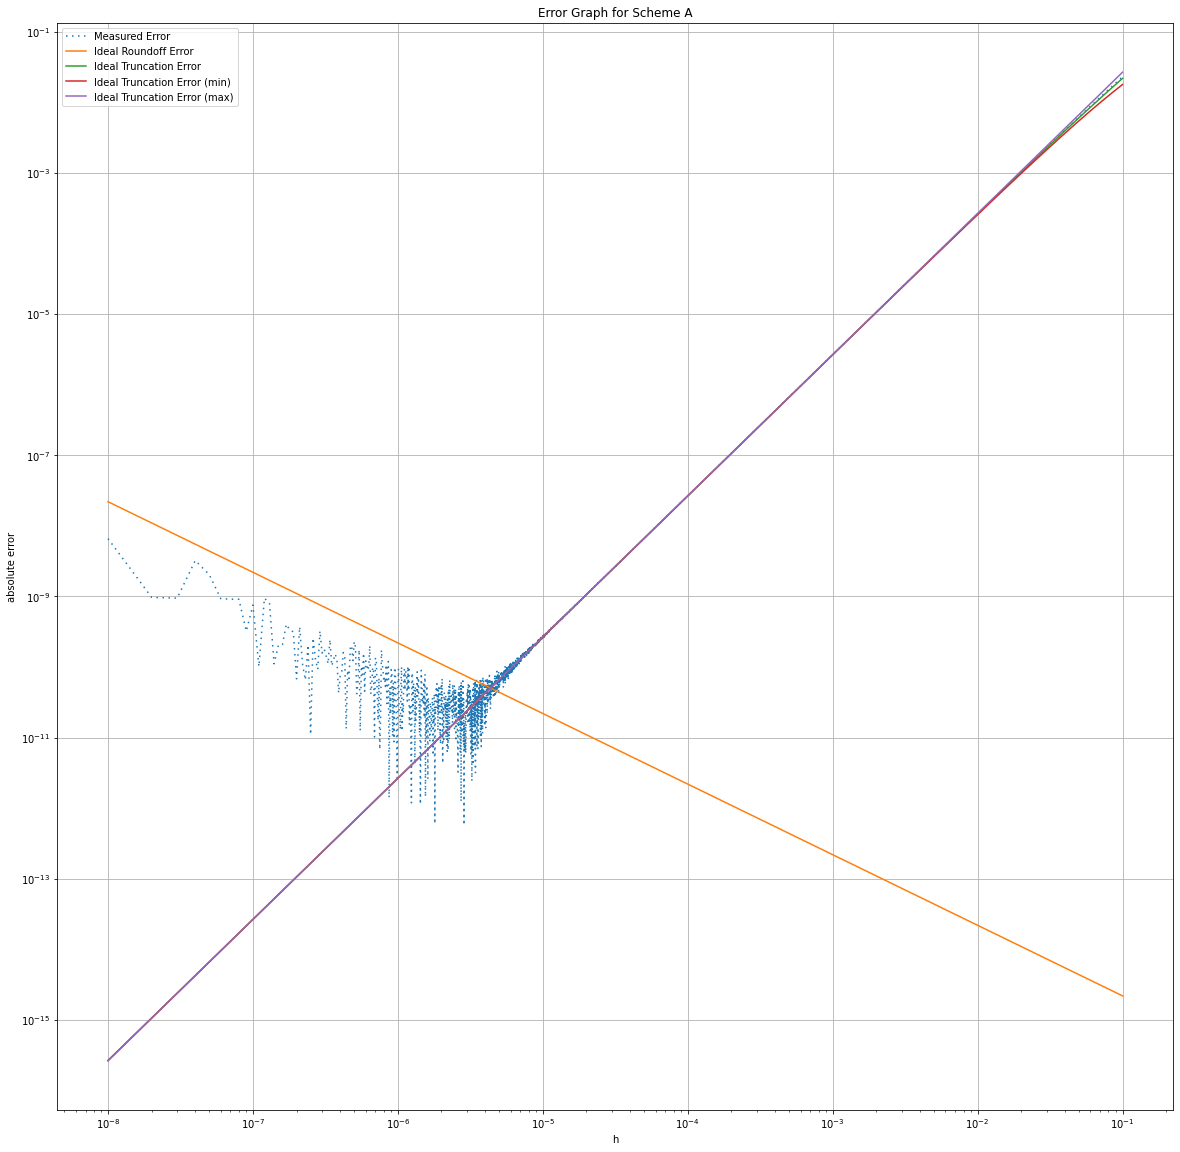

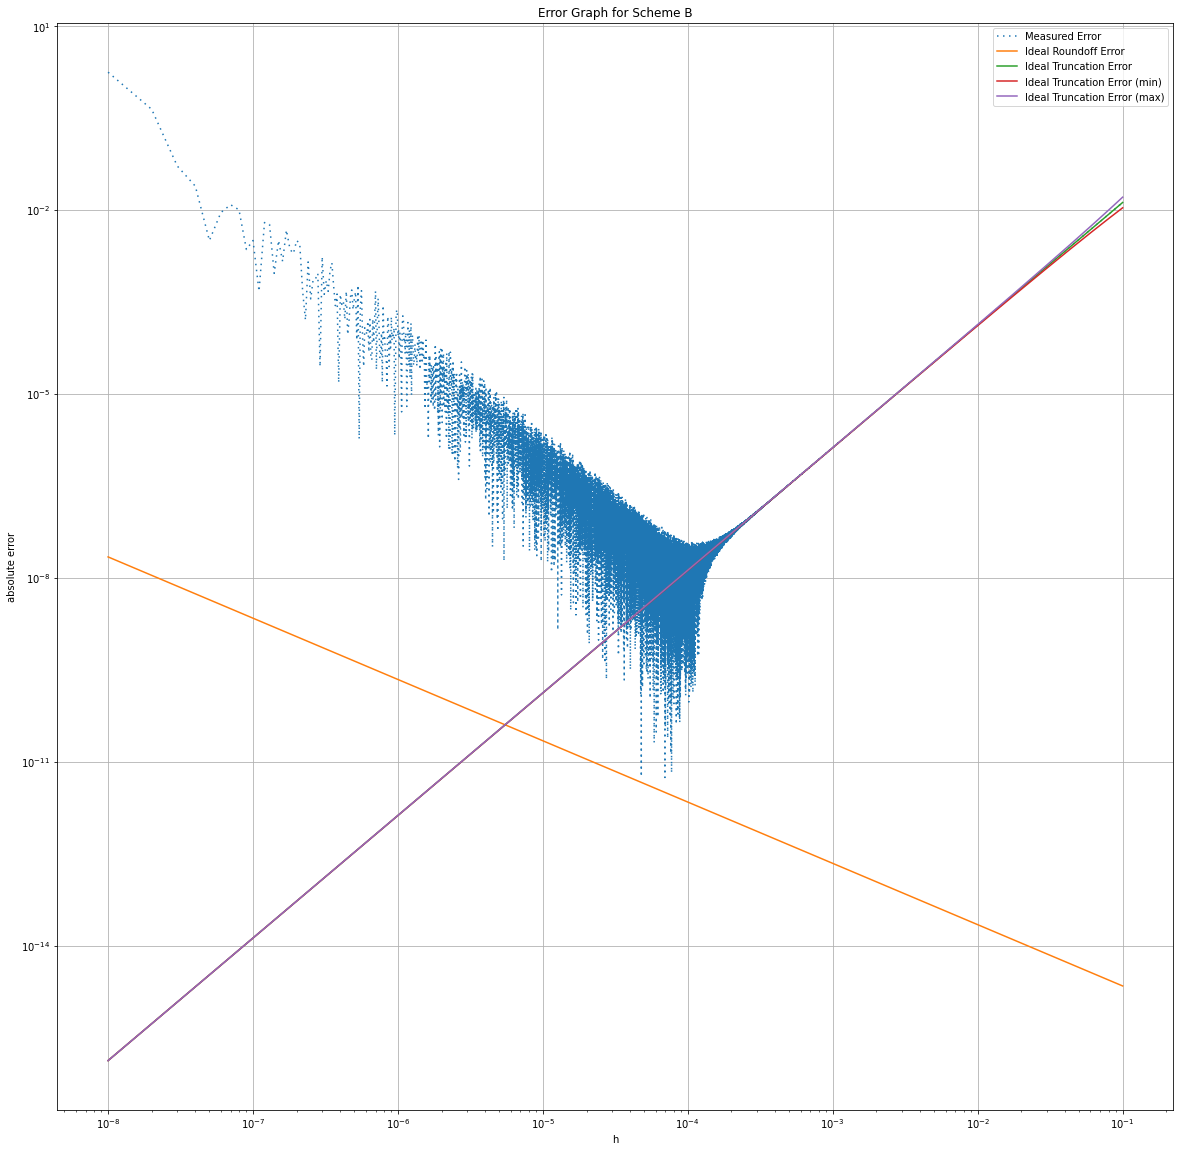

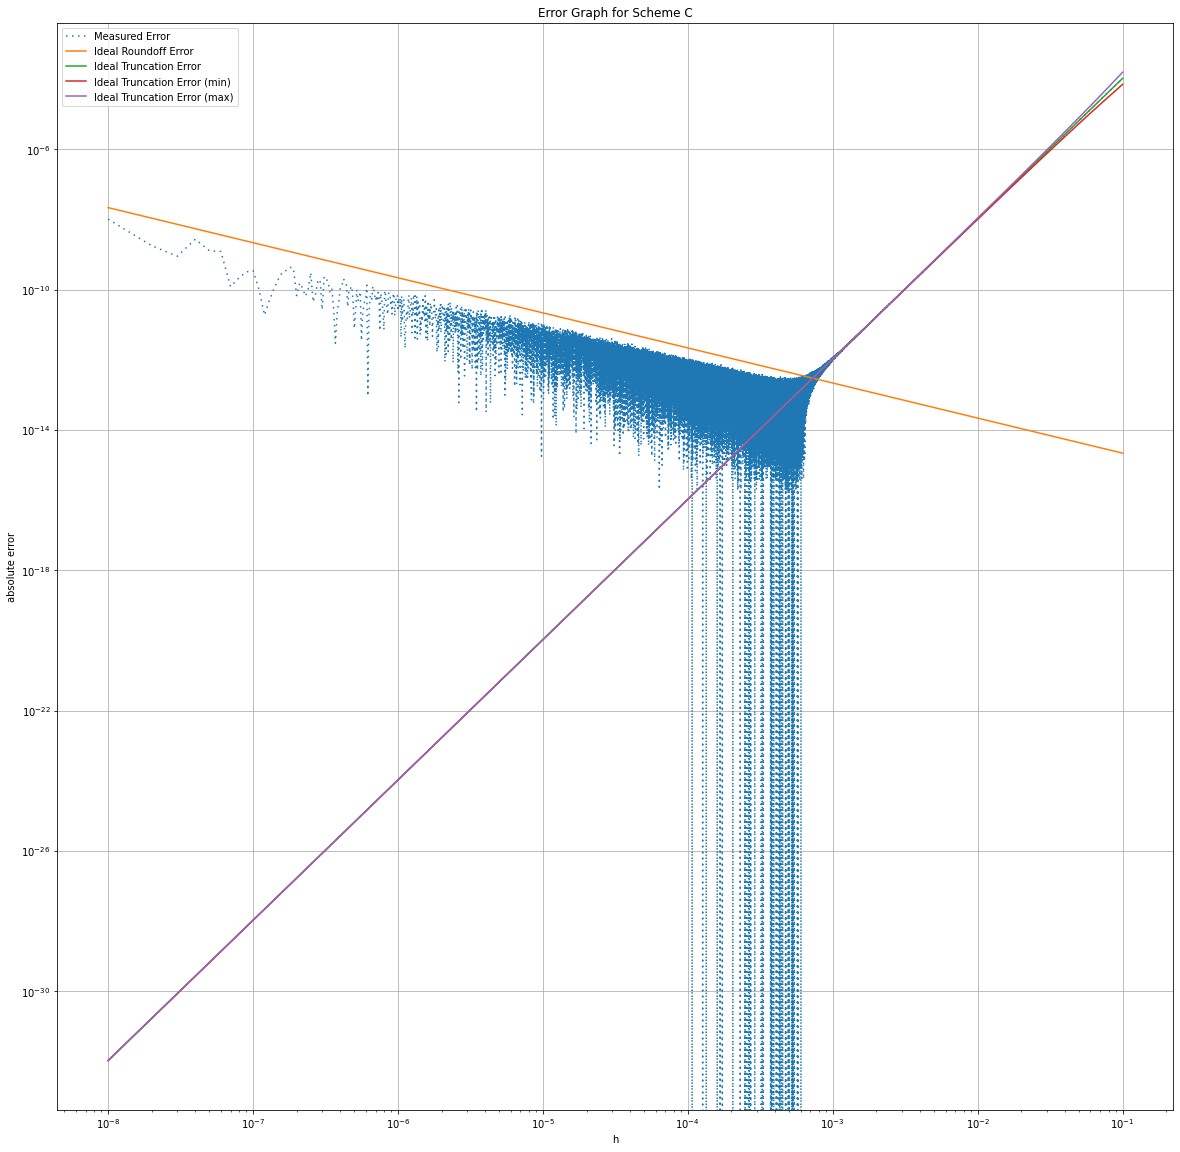

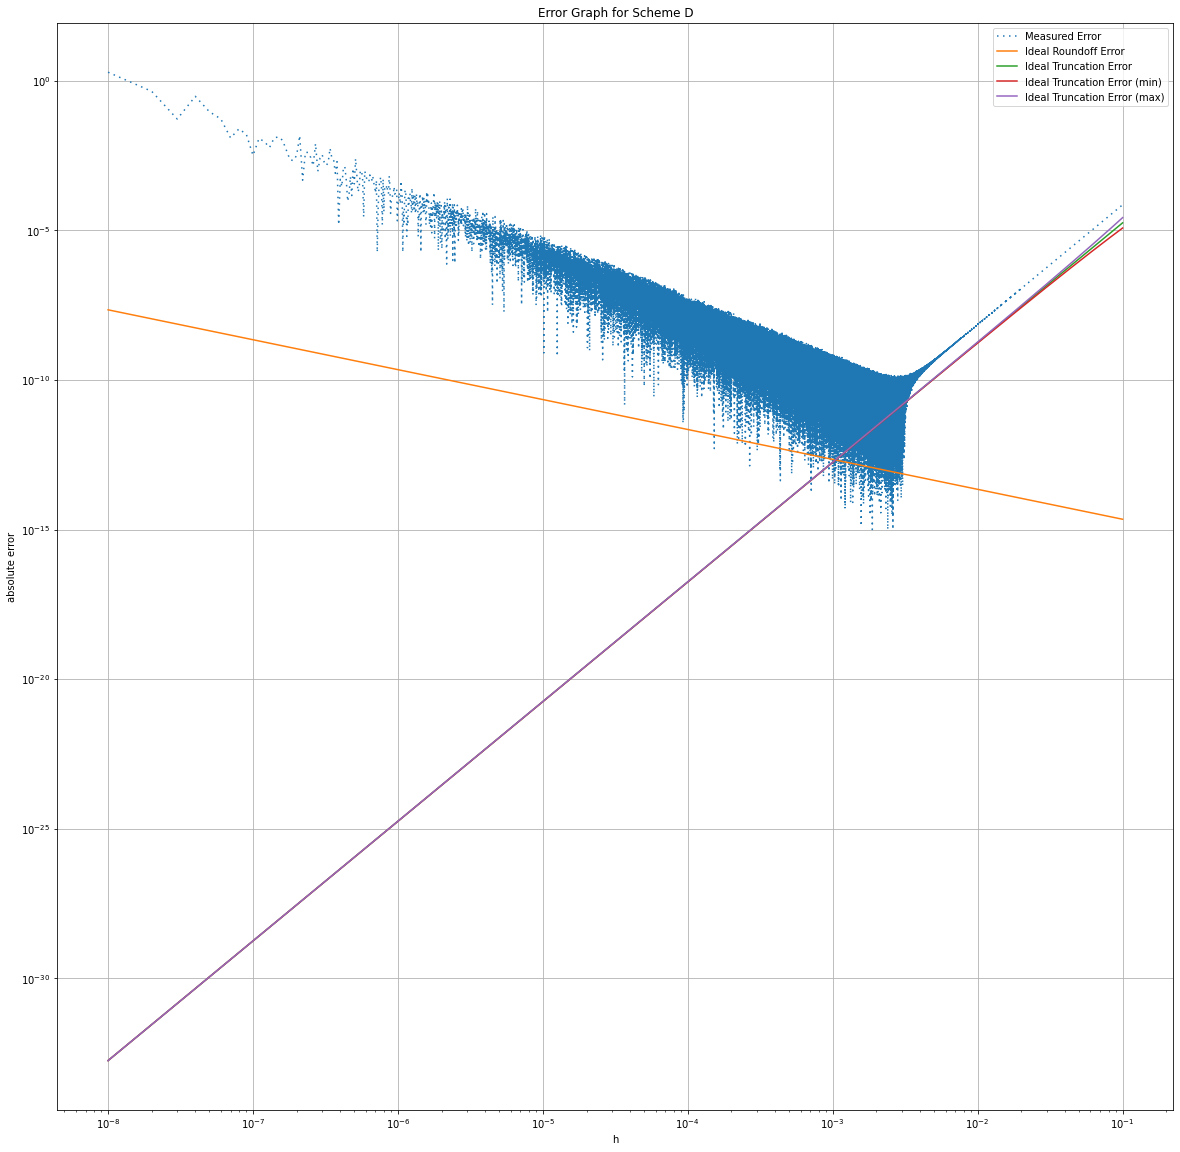

In [15]:
for idx, scheme in enumerate(schemes):
    plt.figure(figsize=(20,20))
    title = 'Error Graph for Scheme ' + scheme
    plt.title(title)
    plt.ylabel('absolute error')
    plt.xlabel('h')
    plt.loglog(h, measured_error[idx], linestyle=(0,(1,3)), label=measure_label)
    plt.loglog(h, ideal_roundoff_error, label=ideal_label)
    plt.loglog(h, trunc_error[idx], label=trunc_label)
    plt.loglog(h, min_trunc_error[idx], label=trunc_label + ' (min)')
    plt.loglog(h, max_trunc_error[idx], label=trunc_label + ' (max)')
    plt.grid()
    plt.legend()
    plt.show()

### Scheme A Graph Comments
#### We see here that the minimizing h value does not correspond to the intersection of the ideal roundoff error or the ideal truncation error. Even with the use of the decimal class to try and get a truer approximation of the floating point round off error it is most likley the result of roundoff error in floating point calculations that prevents the measured error min to match up with the ideal roundoff and ideal truncation errors. A fix for this issue would be to change the precision to be less than the IEEE double precision numbers to be able to see this result more clearly that indeed the measured error and ideal error lines correspond to the intersection. It could also be beneficial to compute by hand an analytic solution for the ideal errors lines and plot those instead. This would remove any errors that are cropping up because of the roundoff error present in every calculation.

### Scheme B Graph Comments
#### The second derivative has a division by h^2 which results in different ideal roundoff error. The ideal roundoff error must also be computed with h^2 in order to see that the plots of measured error and ideals errors will align. See the graphs below where the ideal round off was computed with again with the h^2 denomanator to quickly verify this result.

### Scheme C Graph Comments
#### The results of this graph and its discussion aligns with the discussion of Scheme A, roundoff errors present in every calculation prevent us from seeing the optimal h value that minimizes measured error line up with the intersection of the ideal roundoff errors and truncation error.

### Scheme D Graph Comments
#### The results of this graph and its discussion aligns with the discussion of Scheme B. See the discussion of the graphs with h^2 for more information. It is however puzzling why the measured error does not converge with the truncation error as h becomes much smaller. This is also seen in the graphs with the modified ideal roundoff error. This may be the result of the truncation error for the second derivative having h^4 present. It also could be because this truncation error was taken from the section using richardson extropolation instead of being calculated by hand.

### Schemes with five-point formulas and 2nd derivatives (C, D)
#### There is more noise in the measured error for choices of h smaller than the opitimal h value for 5 points methods. This likely because when using more points there is more error introduced per point chosen leading to a noiser graph. Similarily for the second derivative three point method, the error is compounded by the addition of dividing by h twice.

### Schemes A,B,C Graph Comments
#### Note we see that the measured error converges with the midpoint of the truncation errors which is what we expect from fig 14.2 as roundoff no longer dominates the calculations.

### All graphs comment
#### The measured error is noisy. This is to be expected. Floating point calculations are not necessarily going to be the same since their representations in binary are at times better or worse computationally than what we may expect for math done analytically (i.e. by hand). Even tho h_1=0.00000250 and h=0.00000251 are close in decimal form, in binary operations with floatining point representations they may be causing wildly different amounts of error. It was noticed that when using smallers h vectors that had more space between each h, the plots for ideal error would not even cross. This was the first warning that these ideal lines may not be as accurate as we like and suffer the effects of roundoff error even with the pragmatic approach of the decimal class attempting to remove round off errors. We do see, as expected however, that for larger values of h (after the optimal h) that these differences in computations begin to converge. This is because we move further away from the limit of floating point representations and have less variations in the amount of round off errors we might expect. This is stated on page 422 right above Fig 14.2
#### The roundoff error present in the calculation of the ideal error lines appears to over estimate the optimal h.
#### In the higher order methods (C,D) we see that they achieve a muhch lower error with far fewer steps (i.e. larger h). This is expected since they are more accurate. In log-log axis they also have a much steeper slope for their truncation error since the 2nd order methods since their truncation term is O(h^4). In theory, if the optimal h is produced at the intersection of ideal round off error and truncation error, this steeper slope graphically suggests they are indeed more accurate with larger step sizes since it will intersect with the roundoff error at a larger value of h.
#### The truncation errors for the midpoint and endpoints of the range on which they are defined appear to diverge for large values of h. The graph below confirms this idea. We know this to be the result of under or overestimating by our choice of a forward or backward method, and when viewing a graph for scheme B, a centered method, we see that very clearly. The farther we move from the point we wish to approximate (with larger values of h) the more we over estimate errors. Similarily, the further behind we move away the more we underestimate errors.

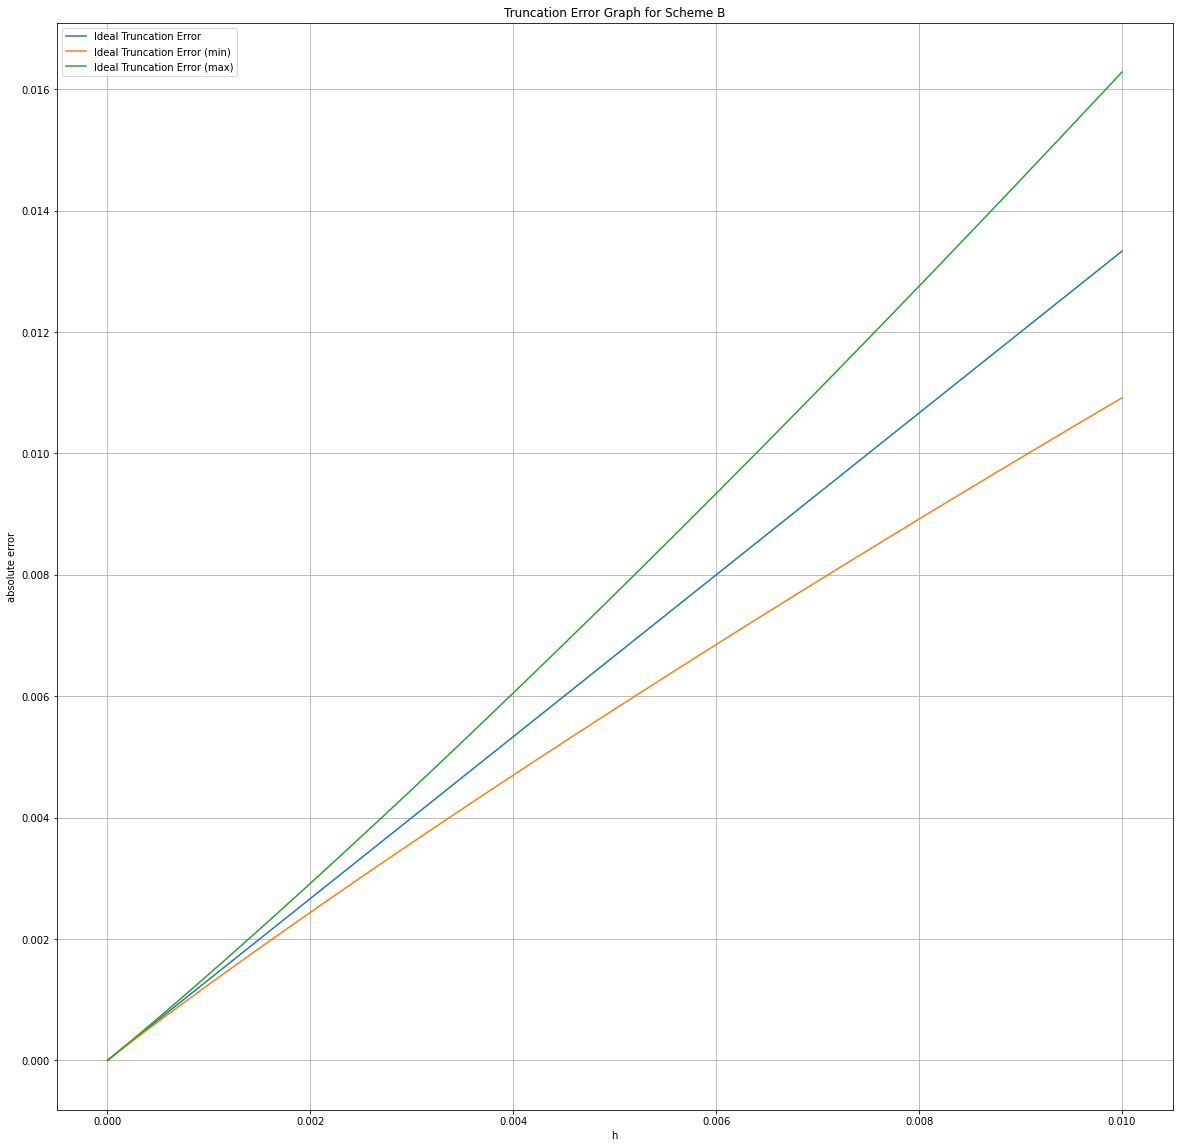

In [14]:
plt.figure(figsize=(20,20))
title = 'Truncation Error Graph for Scheme B'
plt.title(title)
plt.ylabel('absolute error')
plt.xlabel('h')
plt.plot(h, b_ideal_trunc_error, label=trunc_label)
plt.plot(h, b_min_ideal_trunc_error, label=trunc_label + ' (min)')
plt.plot(h, b_max_ideal_trunc_error, label=trunc_label + ' (max)')
plt.grid()
plt.legend()

In [10]:
h = np.float_power(np.arange(start, stop, np.divide(stop - start, np.float_(10**7))), 2)
h = list(map(lambda x: Decimal(repr(x)),list(h)))
#ideal_roundoff_error = np.divide(nu, h)
zip_object = zip(h, nu)
ideal_roundoff_error = []
for hs, nus in zip_object:
    ideal_roundoff_error.append(nus/hs)

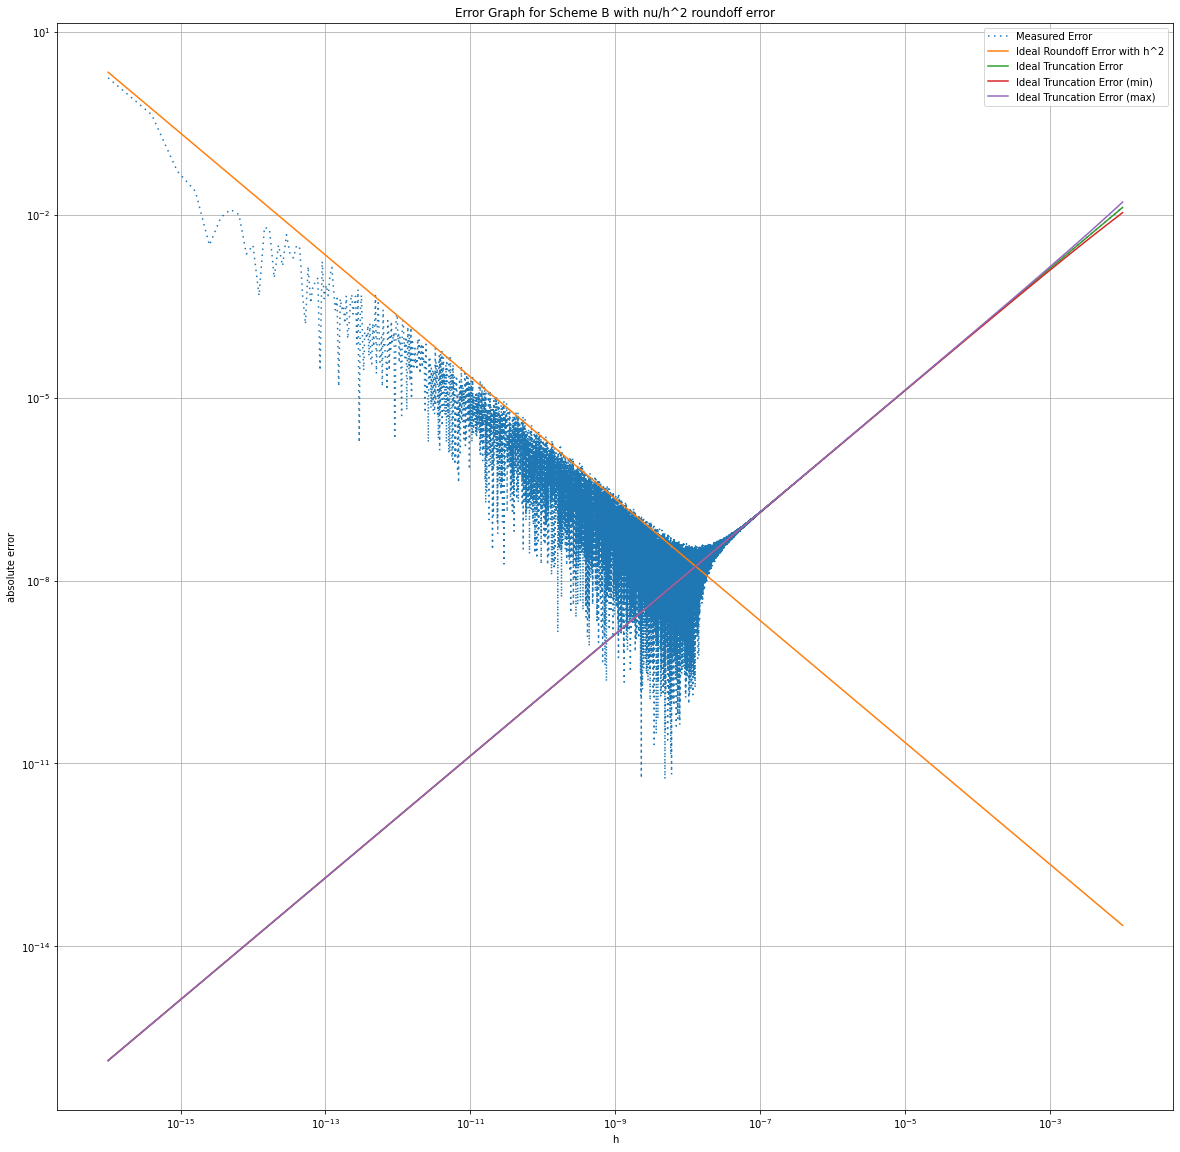

In [13]:
plt.figure(figsize=(20,20))
title = 'Error Graph for Scheme B with nu/h^2 roundoff error'
plt.title(title)
plt.ylabel('absolute error')
plt.xlabel('h')
plt.loglog(h, b_measured_error, linestyle=(0,(1,3)), label=measure_label)
plt.loglog(h, ideal_roundoff_error, label='Ideal Roundoff Error with h^2')
plt.loglog(h, b_ideal_trunc_error, label=trunc_label)
plt.loglog(h, b_min_ideal_trunc_error, label=trunc_label + ' (min)')
plt.loglog(h, b_max_ideal_trunc_error, label=trunc_label + ' (max)')
plt.grid()
plt.legend()

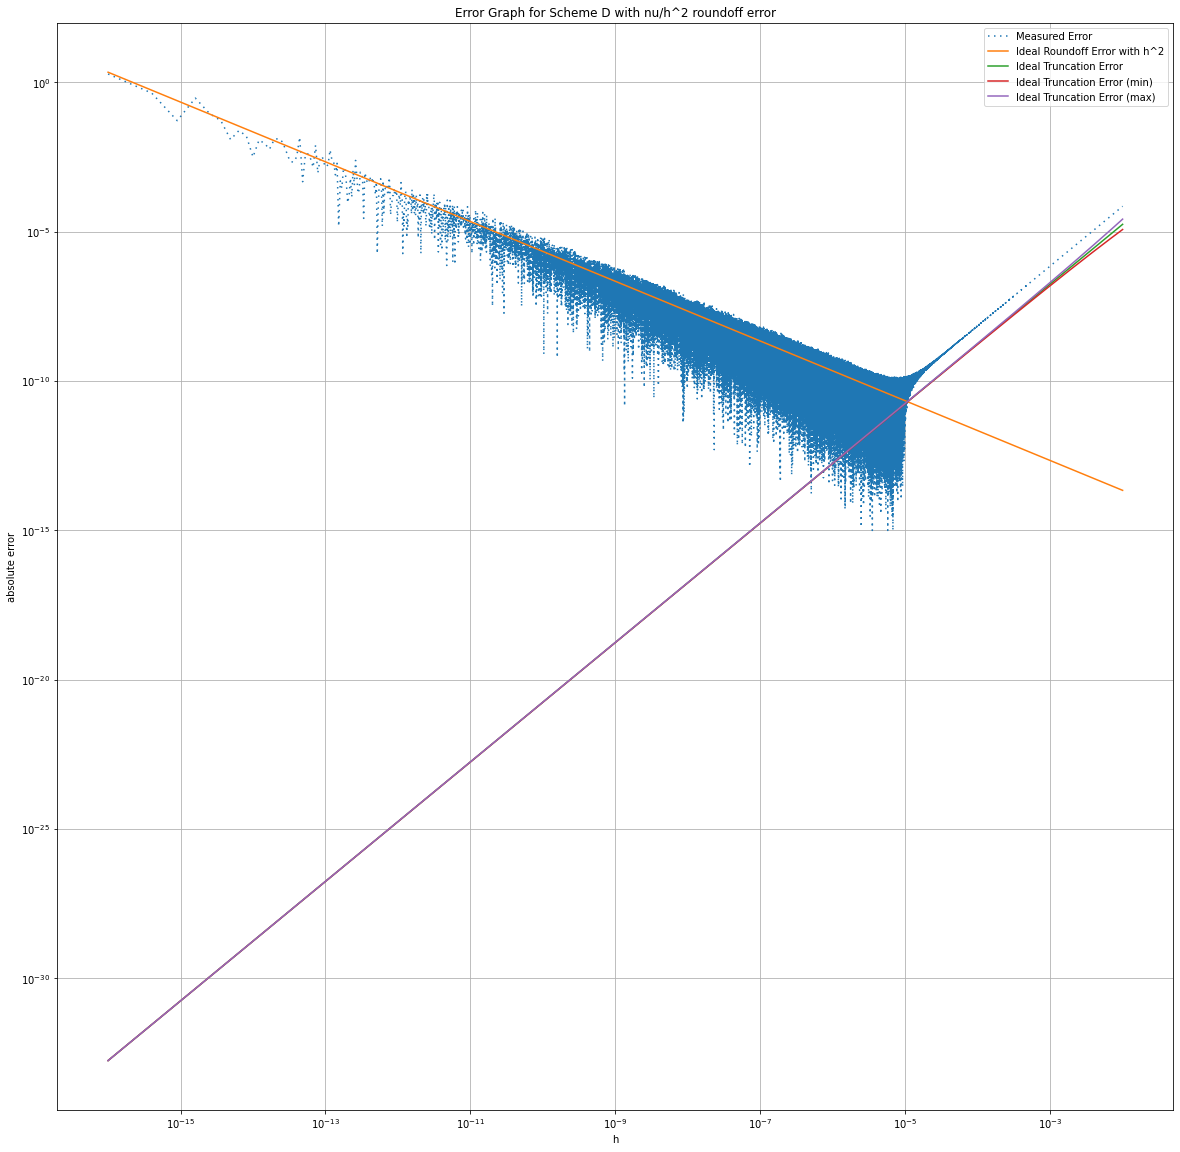

In [12]:
plt.figure(figsize=(20,20))
title = 'Error Graph for Scheme D with nu/h^2 roundoff error'
plt.title(title)
plt.ylabel('absolute error')
plt.xlabel('h')
plt.loglog(h, d_measured_error, linestyle=(0,(1,3)), label=measure_label)
plt.loglog(h, ideal_roundoff_error, label='Ideal Roundoff Error with h^2')
plt.loglog(h, d_ideal_trunc_error, label='Ideal Truncation Error')
plt.loglog(h, d_min_ideal_trunc_error, label=trunc_label + ' (min)')
plt.loglog(h, d_max_ideal_trunc_error, label=trunc_label + ' (max)')
plt.grid()
plt.legend()

### Comments for 2nd derivative methods
#### Immediately we notice that the measured error does not seem to follow the same pattern as what was stated in the book for the graph of Fig 14.2, which is plotting a first derivative. This is most likely found in the math if we were to compute the analytic solution. Also, without an explanation, I do note that the 2nd order method (graph B) appears to reach its optimal h at the intersection of our ideal error lines. This might be because of the roundoff error lining up just right since scheme B uses fewer points and also has an h^2 in it. Trying to say that... the round off error in the numerator and the denimator of scheme B match and thus maybe are cancelling out leading to a result that aligns with our ideal error lines roundoff error as well.